In [305]:
%matplotlib inline

# Module 12 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

# The Problem

When we last left our agent in Modules 1 and 11, it was wandering around a world filled with plains, forests, swamps, hills and mountains. This presupposes a map with known terrain:

```
......
...**.
...***
..^...
..~^..
```

but what if all we know is that we have some area of interest, that we've reduced to a GPS grid:

```
??????
??????
??????
??????
??????
```

and the agent has to determine what kind of terrain is to the left, front and right of it?

Assuming the agent has a very simple visual sensor that constructs a 4x4 grayscale image for each of the three directions, it might it could see something like this:

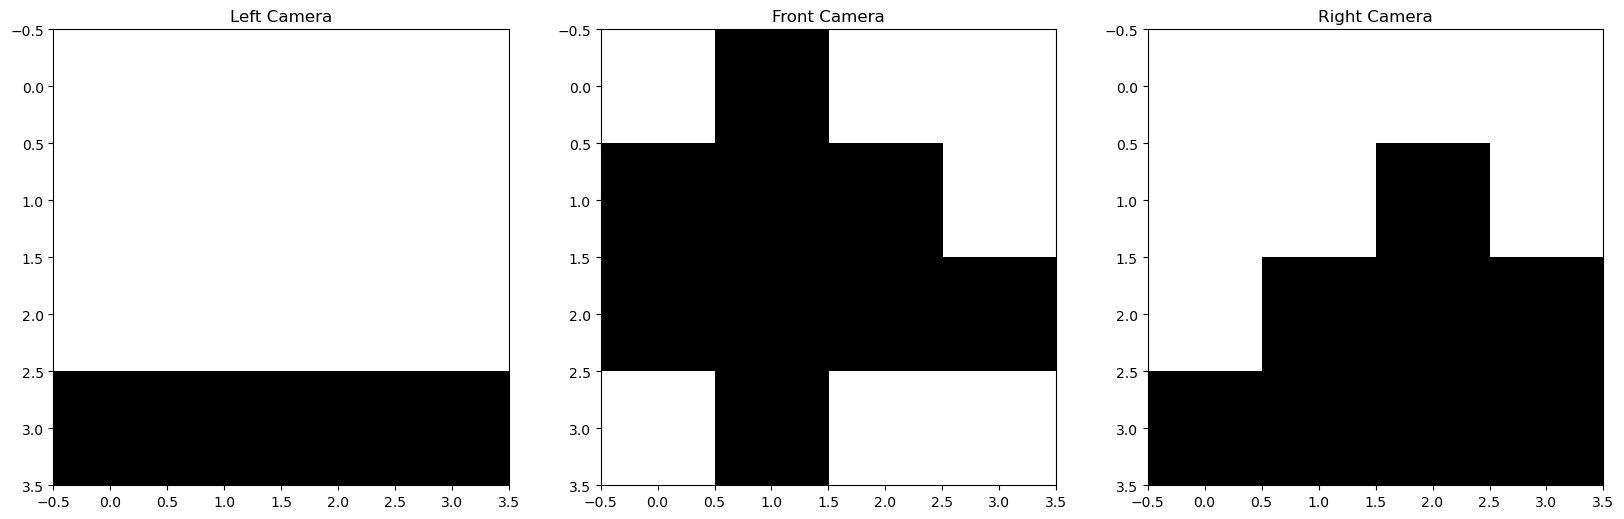

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import random

plain =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 1.0, 1.0, 1.0]
forest = [0.0, 1.0, 0.0, 0.0,1.0, 1.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0,0.0, 1.0, 0.0, 0.0]
hills =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0,0.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]
swamp =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0]

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)
pixels = np.array([255 - p * 255 for p in plain], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Left Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 2)
pixels = np.array([255 - p * 255 for p in forest], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Front Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 3)
pixels = np.array([255 - p * 255 for p in hills], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')

plt.show()
plt.close()

which would be plains, forest and hills respectively.

## The Assignment

For this programming assignment your tasks are:

1. Write a logistic regression that simply determines if something is a hill or not (two class problem). 
2. You will also evaluate that logistic regression by generating a *confusion matrix*.

For a starting point, refer to the Pseudocode and the Self-Check.

## Data

We have clean examples of the different types of terrain but based on the location, the registration can be a bit off for some of the types and the visual sensor is often noisy.

Here are the clean examples with different registrations: 

In [307]:
clean_data = {
    "plains": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, "plains"]
    ],
    "forest": [
        [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, "forest"],
        [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, "forest"]
    ],
    "hills": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, "hills"]
    ],
    "swamp": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "swamp"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, "swamp"]        
    ]
}

Let's create a function that allows us to view any of these:

In [308]:
def view_sensor_image(data):
    figure = plt.figure(figsize=(4,4))
    axes = figure.add_subplot(1, 1, 1)
    pixels = np.array([255 - p * 255 for p in data[:-1]], dtype='uint8')
    pixels = pixels.reshape((4, 4))
    axes.set_title( "Left Camera:" + data[-1])
    axes.imshow(pixels, cmap='gray')
    plt.show()
    plt.close()

"I think that I shall never see a thing so lovely as a tree."

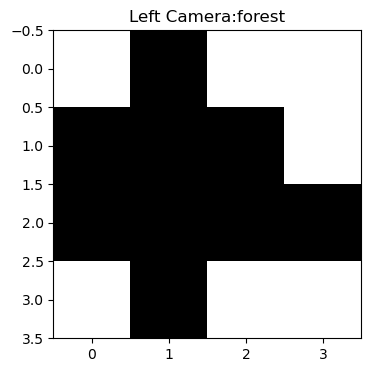

In [309]:
view_sensor_image( clean_data[ "forest"][0])

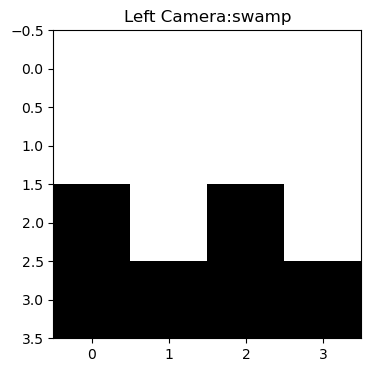

In [310]:
view_sensor_image( clean_data["swamp"][0])

The data that comes in, however, is noisy. The values are never exactly 0 and 1. In order to mimic this we need a `blur` function.

We will assume that noise is normally distributed. For values that should be 0, the noisy values are distributed $N(0.10, 0.05)$. For values should be 1, the noisy values are distributed $N(0.9, 0.10)$.

In [311]:
def blur( data):
    def apply_noise( value):
        if value < 0.5:
            v = random.gauss( 0.10, 0.05)
            if v < 0.0:
                return 0.0
            if v > 0.75:
                return 0.75
            return v
        else:
            v = random.gauss( 0.90, 0.10)
            if v < 0.25:
                return 0.25
            if v > 1.00:
                return 1.00
            return v
    noisy_readings = [apply_noise( v) for v in data[0:-1]]
    return noisy_readings + [data[-1]]

We can see how this affects what the agent *actually* sees.

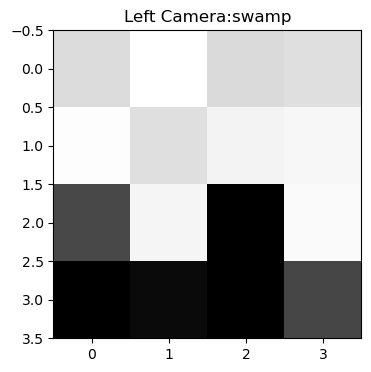

In [312]:
view_sensor_image( blur( clean_data["swamp"][0]))

We need four (4) functions:

1. `generate_data`
2. `learn_model`
3. `apply_model`
4. `evaluate`

### generate_data

`generate_data` has been written for you.

* clean_data - the clean versions of the "bitmaps" for each of the terrain types
* n - the number of samples for "in the class" (1) and "not in the class" (0) to generate.
* label - the label to chose as "in the class".

For example,

`generate_data( clean_data, 100, "hills")`

generates 100 hills, 100 not hills and has transformed the String labels into 1 and 0, respectively.

### `learn_model`

`learn_model` is the function that takes in training data and actually learns the logistic regression model. If you're up to it, you can implement a vectorized version using Numpy but you might start with the loopy version first.

*In the lecture, I mentioned that you usually should mean normalize your data but you don't need to do that in this case because the data is already on the range 0-1.*

I should also mention that gradient descent is not the usual approach to linear regression because the error function actually has an *exact* solution. However, in the case of large data sets, the exact solution often fails and in any case, the use of gradient descent will prepare you for neural networks next week.

When verbose is True, you should print out the error so you can see that it is getting smaller. 

When developing your algorithm, you need to watch the error so you'll set verbose=True to start. You should print it out every iteration and make sure it is declining. You'll have to experiment with both epsilon and alpha; and it doesn't hurt to make alpha adaptive (if the error increases, make alpha = alpha / 10).

When you know that your algorithm is working, change your code so that the error is printed out only every 1,000 iterations (it takes a lot of iterations for this problem to converge, depending on your parameter values--start early).

`learn_model` returns the List of Thetas.

### `apply_model`

`apply_model` takes a List of Thetas (the model) and either labeled or unlabeled data. If the data is unlabeled, it will return predictions for each observation as a Tuple of the inferred value (0 or 1) and the actual probability (so something like (1, 0.73) or (0, 0.29). We always return the class with the higher probability.

If the data are labeled, you will return a Tuple of the actual value (0 or 1) and the predicted value (0 or 1). In this case, you return a List of something like [(0, 1), (1, 1), (0, 0), (1, 0)].

### `evaluate`

Ideally, we should be running 10 fold cross validation on this problem but...that might take a while so we're going to just go ahead with a simple evaluation. We're interested not only in the error rate but the overall "confusion" of the model.

The `evaluate` takes the results of `apply_model` when labeled=True and prints out the error rate and a confusion matrix.

---

Why `labeled=True` or `labeled=False`? While we only have labeled data right now, for model evaluation. In the future, you would need to use this function to do actual classification. In that case, `labeled=False`. Because in the long run, that's the default usage, we use `False` as the default.

---

**As always when working with Lists or Lists of Lists, be very careful when you are modifying these items in place that this is what you want.**

---

Put your helper functions above here.

## Main Functions

Use `generate_data` to generate a balanced set of blurred "hills" and "not-hills" examples to test that the function is working.

In [313]:
def generate_data( data, n, key_label):
    labels = list(data.keys())
    labels.remove(key_label)

    total_labels = len(labels)
    result = []
    # create n "not label" and code as y=0
    count = 1
    while count <= n:
        label = labels[count % total_labels]
        datum = blur(random.choice(data[label]))
        xs = datum[0:-1]
        result.append((xs, 0))
        count += 1

    # create n "label" and code as y=1
    for _ in range(n):
        datum = blur(random.choice(data[key_label]))
        xs = datum[0:-1]
        result.append((xs, 1))
    random.shuffle(result)
    return result

In [314]:
results = generate_data( clean_data, 10, "hills")
for result in results:
    print(result)

([0.005114242441218969, 0.16171361969096856, 0.0713012014234107, 0.01173096022006101, 0.07120627791352951, 0.1477034240051288, 1.0, 0.09603964994108673, 0.07380538414487088, 0.8706500615382093, 0.8566400935789618, 1.0, 0.9280931585722832, 0.9585930427479249, 0.7373359804693906, 0.959513774843641], 1)
([0.0349742611103875, 0.0, 0.19422684945668112, 0.0505833207344006, 0.15569684961208524, 0.09080135493389892, 0.9330486808569296, 0.11823897927357492, 0.10591650122158573, 0.9137615219532643, 0.8485823674827344, 0.654763962000512, 0.9080531835565265, 0.7189655966746948, 0.9371579635271752, 1.0], 1)
([0.7506444176198945, 0.07648730761204457, 0.1072361132678086, 0.11545686628034166, 0.9908442232238821, 0.8757857099698835, 0.05660673279875042, 0.1916514811813907, 0.9268461137194975, 0.971367252460351, 0.8587543735565603, 0.07464730757052884, 0.8740366160698639, 0.2063219012170222, 0.08710158044781594, 0.1633769538880413], 0)
([0.11310056833292333, 0.01845396058892715, 0.20038787739519193, 0.0

### <a id="calculate_error"></a> calculate_error

Formal Parameters:

**thetas** A list of thetas

**data** The data

**return** The formula for logistic error

This function is called in [learn_model](#learn_model) to calculate the current error, so that it can be compared to the previous error as a stopping condition.

In [315]:
def calculate_error(thetas,data):
    n = len(data)
    error = 0
    for data_point in data:
        y = data_point[1]
        y_hat = calculate_y_hat(data_point,thetas)
        if y_hat != 1 and y_hat != 0:
            error-= y*np.log(y_hat) + (1-y)*np.log(1-y_hat)
    return error/n
        

### <a id="calculate_y_hat"></a> calculate_y_hat

Formal Parameters:

**thetas** A list of thetas

**data_point** A particular observation

**return** `y_hat`-the predicted value based on the thetas, the logistic model, and the features of the observation

This function is called in [derivative](#derivative) to find the derivative, in [calculate_error](#calculate_error) to calculate the current error, and in [apply_model](#apply_model) to make a prediction.  It is a logistic curve prediction.

In [316]:
def calculate_y_hat(data_point,thetas):
    X = thetas[0]
    for i in range(len(data_point[0])):
        X+= thetas[i+1]*data_point[0][i]
    X*=-1
    y_hat = 1/(1+np.exp(X))
    return y_hat

### <a id="derivative"></a> derivative

Formal Parameters:

**j** The particular component of the dot product that the partial derivative is being taken with respect to.

**thetas** A list of thetas

**data_point** A particular observation

**return** `y_hat`-the predicted value based on the thetas, the logistic model, and the features of the observation

This function is called in [learn_model](#learn_model) to update the thetas

In [317]:
def derivative(j,thetas,data):
    n = len(data)
    total = 0
    for data_point in data:
        if j == 0:
            total += (calculate_y_hat(data_point,thetas) - data_point[1])*1
        else:
            total += (calculate_y_hat(data_point,thetas) - data_point[1])*data_point[0][j-1]
    return total/n

### <a id="learn_model"></a> learn_model

Formal Parameters:

**data** The data

**verbose** Whether or not to print the error every `ERROR_PRINT` times.  Default is False.

**MAGIC CONSTANTS**

**`EPSILON`**  The stopping condition on the difference between the current and previous errors. Set to 10^(-5)

**`ALPHA`** `= .1`. The factor on the derivative to do gradient descent to ensure convergence.

**`ERROR_PRINT`** `=1000` How many iterations of the algorithm before printing the next error.

**return** `thetas`-the list of thetas

This function is used to fit a regression curve to data.  It returns the coefficients of each term in the curve.

In [318]:
def learn_model(data, verbose=False):
    EPSILON = 10**(-5)
    ALPHA = .1
    ERROR_PRINT = 1000
    m = len(data[0][0])
    thetas = []
    for i in range(m+1):
        thetas.append(random.uniform(-1,1))
    previous_error = 0
    current_error = calculate_error(thetas,data)
    counter = 0
    while abs(current_error-previous_error)>= EPSILON:
        new_thetas = []
        for j in range(m+1):
            new_thetas.append(thetas[j]-ALPHA*derivative(j,thetas,data))
        thetas = new_thetas
        previous_error = current_error
        current_error = calculate_error(thetas,data)
        counter+=1
        if verbose and counter%ERROR_PRINT == 1:
            print(current_error)
    if verbose:
        print(abs(current_error-previous_error))
    return thetas

### <a id="apply_model"></a> apply_model

Formal Parameters:

**test_data** The data to test on

**labeled** Whether or not the data is labeled with the correct y.  The default is False.

**model** The regression curve.

**MAGIC FUNCTION**  

**[calculate_y_hat](#calculate_y_hat)**  We are assuming that `model` (The list of thetas) is for a logistic regression curve.

**return** rv-the tuple `(actual,predicted)` if the data is labeled, or `(predicted class, predicted percentage)` if not.

This function is used to make predictions on the test data based on the model for the thetas.  It calls [calculate_y_hat](#calculate_y_hat) on the assumption that this is a logistic regression model.

In [319]:
def apply_model(model, test_data, labeled=False):
    rv = []
    
    for data_point in test_data:
        y_hat = calculate_y_hat(data_point,model)
        if 0<= y_hat < .5:
            predicted = 0
        elif .5<=y_hat<=1:
            predicted = 1
        if labeled:
            rv.append((data_point[1],predicted))
        else:
            rv.append((predicted,y_hat))
    return rv

### <a id="evaluate"></a> evaluate

Formal Parameters:

**results** a list of tuples of `(actual,predicted)` from a call to [apply_model](#apply_model) with `labeled = True` 

**return** `None`

This function is used to print the error rate and confusion matrix based on the results from [apply_model](#apply_model) with `labeled = True`.

In [320]:
def evaluate(results):
    n = len(results)
    error,TP,FP,TN,FN = 0,0,0,0,0
    for result in results:
        actual,predicted = result
        if actual == predicted == 0:
            TN +=1
        elif actual == predicted == 1:
            TP +=1
        elif actual == 1 and predicted == 0:
            FN +=1
            error +=1
        elif actual == 0 and predicted == 1:
            FP += 1
            error +=1
    confusion_matrix = [["True Positive: " +str(TP), "False Negative: "+ str(FN)],["False Positive: "+ str(FP),"True Negative: "+str(TN)]]
    error_rate= 100*(error/n)
    print(f"Error rate: {error_rate:.2f}%" )
    print(confusion_matrix)
    
    

In [321]:
test_evaluate = [(1,1),(1,1),(1,1),(0,0),(0,0),(1,0),(0,1),(0,1),(0,1),(0,1),(1,1),(1,1)]
evaluate(test_evaluate)

Error rate: 41.67%
[['True Positive: 5', 'False Negative: 1'], ['False Positive: 4', 'True Negative: 2']]


## Use your code

Use `generate_data` to generate 100 blurred "hills" examples balanced with 100 "non hills" examples and use this as your test data. Set labeled=True. Print out the first 10 results, one per line.

In [322]:
train_data = generate_data(clean_data, 100, "hills")

In [323]:
test_data = generate_data(clean_data, 100, "hills")

Use `learn_model` to learn a logistic regression model for classifying sensor images as "hills" or "not hills". Use your `generate_data` function to generate a training set of size 100 for "hills". **Set Verbose to True**

In [324]:
model = learn_model( train_data, True)

0.9264362876440886
0.34780767678406976
0.25368583261284444
0.2059185944763537
0.17530469821957342
0.15361379029894992
0.13740095927802282
0.1248310227892832
9.997975167375106e-06


Apply the model to the test data:

0.012039404550511196

In [326]:
results = apply_model( model, test_data,labeled=True)
print(results)
print(len([x for x in results if x[0]!=x[1]]))

[(1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 1), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0),

Using the results above, print out your error rate (as a percent) and the confusion matrix:

In [327]:
evaluate(results)

Error rate: 2.50%
[['True Positive: 99', 'False Negative: 1'], ['False Positive: 4', 'True Negative: 96']]


## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.

In order to avoid overfitting the data (and save time) I set `EPSILON = 10**(-5)` 